In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = 'D:/Amy Ciou/ML100Days/homework/data/'


In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
app_train['AMT_INCOME_TOTAL'].mean()

168797.9192969845

In [7]:
app_train['AMT_INCOME_TOTAL'].var()

56227386501.174484

In [10]:
app_train['AMT_INCOME_TOTAL'].std()

237123.14627883647

ValueError: shape mismatch: objects cannot be broadcast to a single shape

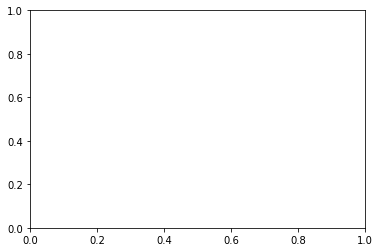

In [13]:
col_count = 2                # 由於有3個月，設定類別基數為3
bar_width = 0.2                # 設定長條圖每個長條寬度
index = np.arange(col_count)   # 依據3個類別(3個月)設定索引值，便於後續長條圖的位置設定
# 自原始資料中分別擷取5個肇事原因的件數
A = app_train[app_train.NAME_EDUCATION_TYPE == "Academic degree"]["AMT_INCOME_TOTAL"]          
B = app_train[app_train.NAME_EDUCATION_TYPE == "Higher education"]["AMT_INCOME_TOTAL"]
C = app_train[app_train.NAME_EDUCATION_TYPE == "Incomplete higher"]["AMT_INCOME_TOTAL"]
D = app_train[app_train.NAME_EDUCATION_TYPE == "Lower secondary"]["AMT_INCOME_TOTAL"]
E = app_train[app_train.NAME_EDUCATION_TYPE == "Secondary / secondary special"]["AMT_INCOME_TOTAL"]

# 設定bar的圖型
A = plt.bar(index,         # 索引值代表A肇事原因的長條位置，如index=[0,1,2]，分別在3個月的第一個位置
            A,              # 設定長條圖的資料 
            bar_width,      # 設定長條寬度
            alpha=.6,       # 設定透明度
            label="Academic degree")# 設定標籤 
B = plt.bar(index+0.2,     # 索引值為A的索引值+0.2(長條寬度)，顯示於A長條的旁邊一個長條寬度的位置
            B,
            bar_width,
            alpha=.6,
            label="Higher education") 
C = plt.bar(index+0.4,
            C,
            bar_width,
            alpha=.6,
            label="Incomplete higher")
D = plt.bar(index+0.6,
            D,
            bar_width,
            alpha=.6,
            label="Lower secondary")
E = plt.bar(index+0.8,
            E,
            bar_width,
            alpha=.6,
            label="Secondary / secondary special")

# 使得每個長條圖上顯示資料標籤，詳見：[https://stackoverflow.com/questions/40489821/how-to-write-text-above-the-bars-on-a-bar-plot-python](http://)
def createLabels(data):                   # 自定義函數，為引用plusone團隊
    for item in data:
        height = item.get_height()
        plt.text(
            item.get_x()+item.get_width()/2., 
            height*1.05, 
            '%d' % int(height),
            ha = "center",
            va = "bottom",
        )
createLabels(A)
createLabels(B)
createLabels(C)
createLabels(D)
createLabels(E)

# 定義標籤
plt.ylabel("income")          # 設定y軸標題 
plt.xlabel("education level")            # 設定x軸標題
plt.title("Education level and Income ", {'fontsize' : 17})  # 設定標題、文字大小
plt.xticks(index+ .3 / 2 ,("Cash loan", "Revolving loan"))  #.xticks為x軸文字(為了置中所以+0.3/2)
plt.ylim(0, 250)                 # 設定y軸範圍
plt.legend(prop = {'size':9})    # 設定圖例及其大小
plt.grid(True)                   # 顯示格線

# 儲存圖檔
plt.savefig("Bar chart of car accident.jpg",   # 儲存圖檔
            bbox_inches='tight',               # 去除座標軸占用的空間
            pad_inches=0.0)                    # 去除所有白邊
plt.close()      # 關閉圖表

Text(0.5, 0, 'AMT_INCOME_TOTAL')

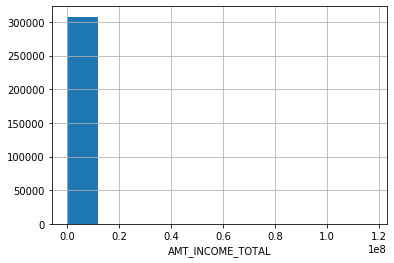

In [14]:
app_train['AMT_INCOME_TOTAL'].hist()
plt.xlabel('AMT_INCOME_TOTAL')

Text(0.5, 0, 'AMT_INCOME_TOTAL')

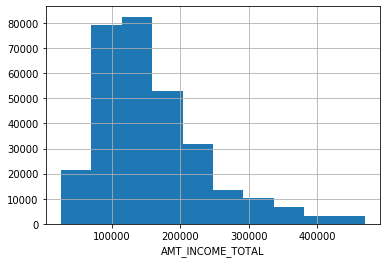

In [15]:
app_train.loc[app_train['AMT_INCOME_TOTAL']<app_train['AMT_INCOME_TOTAL'].quantile(0.99)]['AMT_INCOME_TOTAL'].hist()
plt.xlabel('AMT_INCOME_TOTAL')